In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

model_error_raw_results = pickle.load(open(f'vol_window_raw_results1.pkl', 'rb'))

In [2]:
model_error_raw_results_copy =  model_error_raw_results.copy()
fixed_model_error_raw_results = {key: item[0] if type(item) == list else item for key, item in model_error_raw_results_copy.items()}

In [3]:
model_error_raw_results = fixed_model_error_raw_results

In [4]:
import sys
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)


from ConformalMethods import AdaptiveCP, ACP_plots, ACP_data

def create_changing_var_data(lookback_array, times) -> tuple:
        '''This will take an array of model errors and return a time series with changing variance models.
        Times will be the number of dists it should make for each model error.
        
        returns dictionary containing the tuples of dists'''  

        # change to lookback
        return_dict = {key: [] for key in lookback_array}

        # Load a random stock
        stock_data = ACP_data.stock_data(times)

        for lookback in lookback_array:
            stock_correction = ACP_data.xvy_from_ACP(stock_data, lookback)
            return_dict[lookback] = stock_correction
            
        return return_dict, stock_data

times = 1
lookback_array = np.linspace(10, 250, 10).astype(int)
model_error_data_dict, aci_data = create_changing_var_data(lookback_array, times)


In [5]:
# Now I am going to plot the beta for differnt keys on the same plot. 

def compare_betas(keys_to_compare):
     # Plot phi
    plt.figure(figsize=(8, 6))

    for key in keys_to_compare:
        params = model_error_raw_results[key]['params_t_list']['lower']
        phi, beta = list(zip(*params))
        weight = pd.Series(model_error_data_dict[key][0][1][250:]).rolling(50).mean()
        
        phi_weight = pd.Series(phi).rolling(50).mean() 
        
        sns.lineplot(x=range(len(beta)), y= phi_weight, label = f'Average of phi: {key}')
        sns.lineplot(x=range(len(beta)), y=pd.Series(beta).rolling(50).mean() * weight, label=f'Model Error: {key}')
    
    plt.xlabel('Time')
    plt.ylabel('Phi')
    plt.title(f'Phi for Model Error {key}')
    plt.show()

In [6]:
def compare_param_contribution(keys_to_compare, lower = True):

    if lower:
        param_type = 'lower'
    else:
        param_type = 'upper'
     # Plot phi
    plt.figure(figsize=(8, 6))

    for key in keys_to_compare:
        params = model_error_raw_results[key]['params_t_list'][param_type]
        phi, beta = list(zip(*params))
        
        var = np.array(model_error_data_dict[key][0][1][250:])
        
        var_component = beta * var
        
        sns.lineplot(x=range(len(beta)), y= var_component, label = f'Var component {key}')
        sns.lineplot(x=range(len(beta)), y=phi, label=f'"Phi Component {key}')
    
    plt.xlabel('Time')
    plt.ylim(-30, 10)
    plt.ylabel('Phi')
    plt.title(f'Phi for Model Error {key}')
    plt.show()

In [7]:
print(*model_error_raw_results.keys())

10 36 63 90 116 143 170 196 223 250


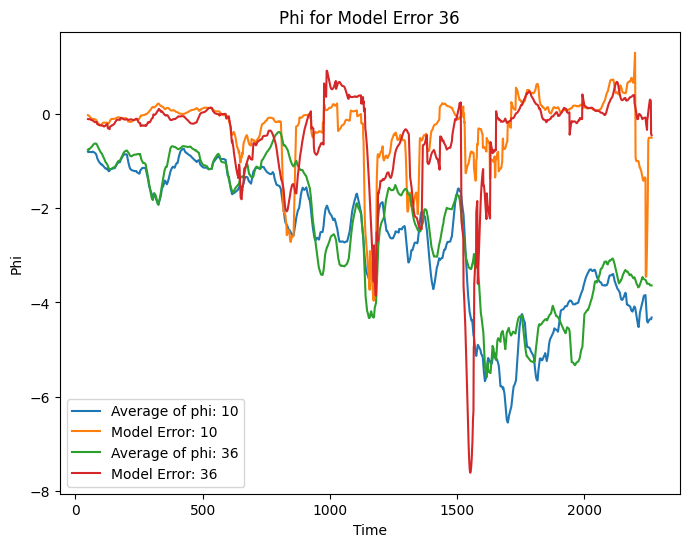

In [8]:
compare_betas([10, 36])

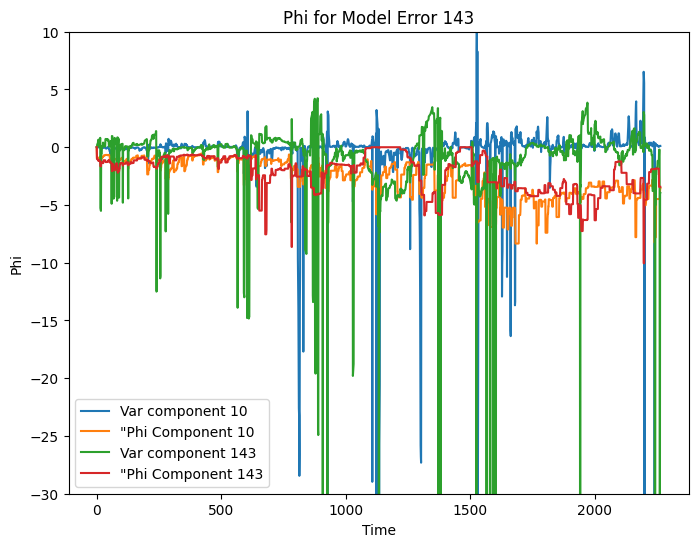

In [51]:
compare_param_contribution([10, 143])

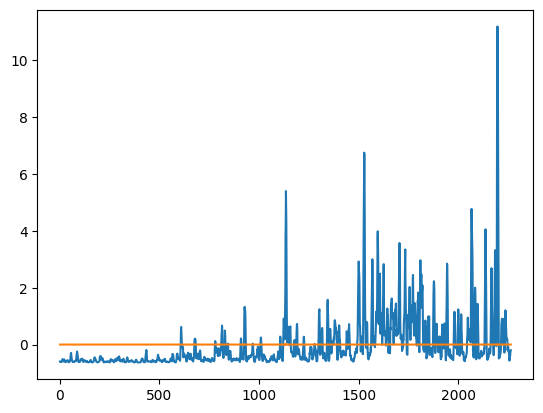

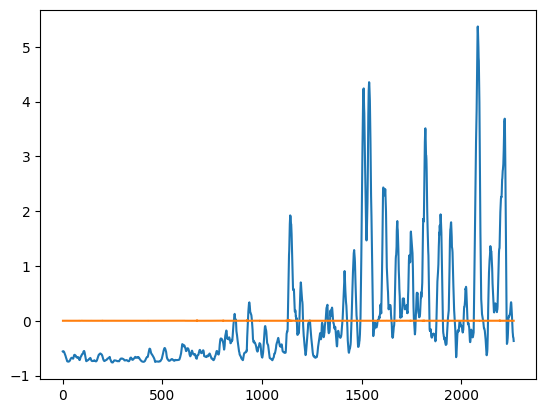

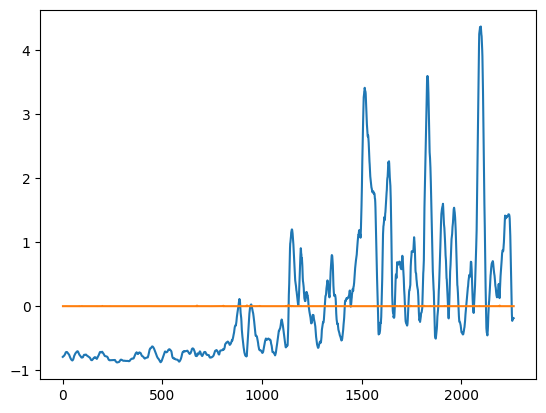

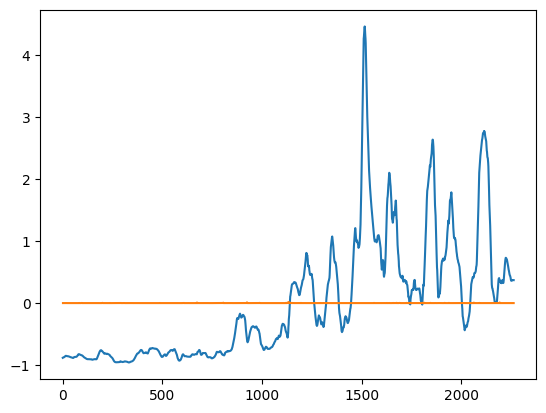

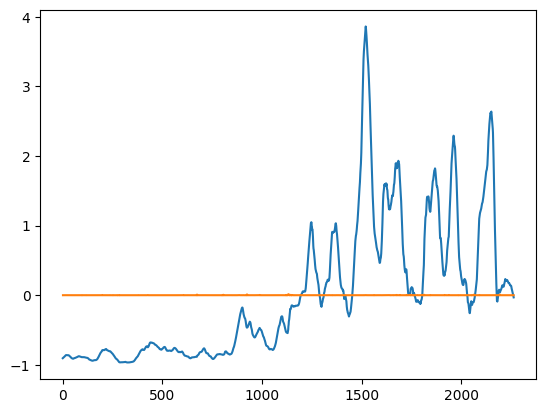

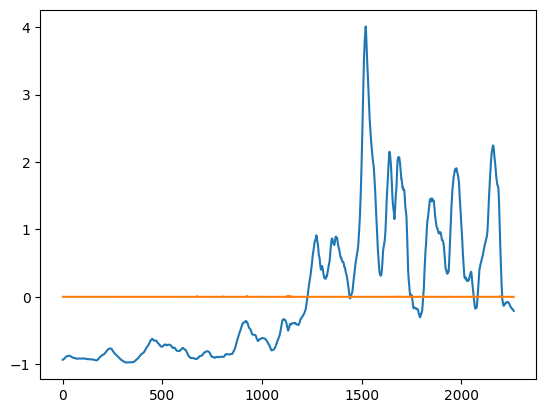

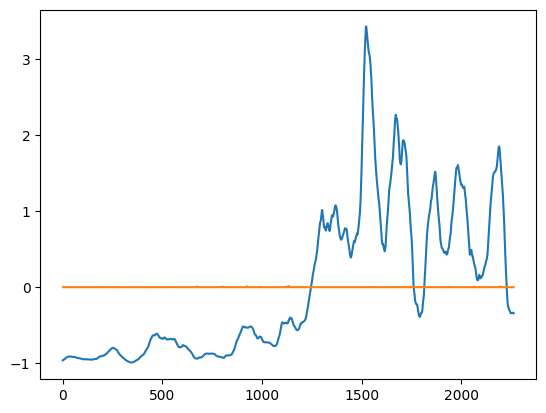

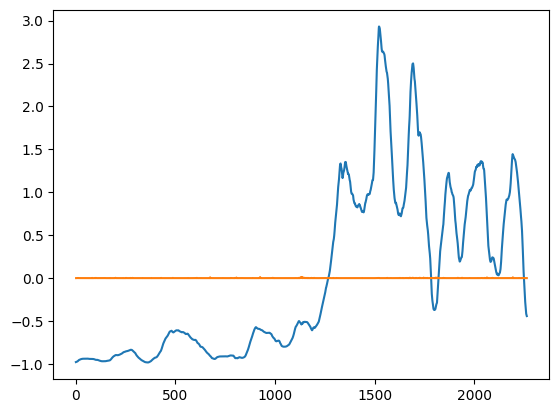

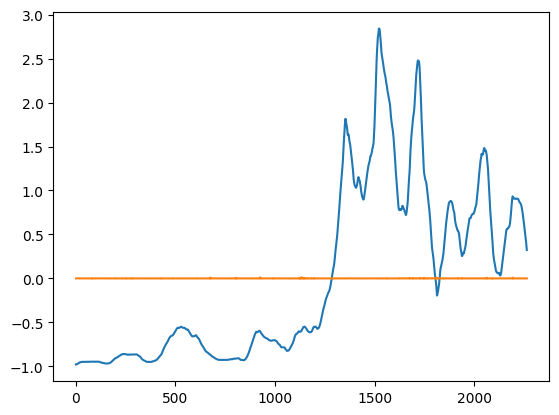

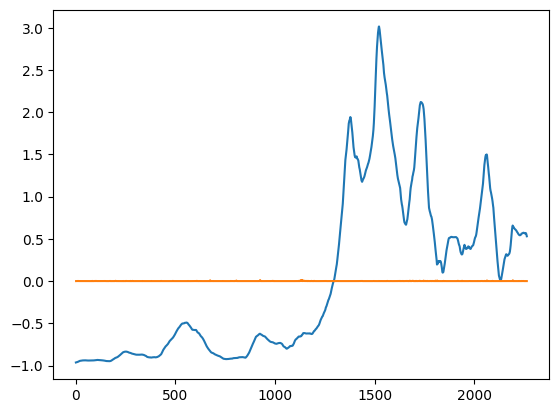

In [10]:
# import scaler to shift to zero mean
from sklearn.preprocessing import StandardScaler

for key in model_error_data_dict.keys():
    scaler = StandardScaler()
    variance_model = scaler.fit_transform(np.array(model_error_data_dict[key][0][1][250:]).reshape(-1, 1))      
    
    plt.plot(variance_model)
    plt.plot(pd.Series(model_error_data_dict[key][0][0][250:]).pct_change()**2)
    plt.show()

10:
Var is mean around zero with a few extremes, it has a period in 100-1200 where it is more consitently being used however in general it is not as good.

36:
Potentialy getting 

143:
The var componet has larger osscilations. It is being used more than last in some cases.

General trend var component is used more for the larger lookbacks. This is likley because it is more consistent so you can be more sure of its value. 

This is backed up by the fact that on the righthand side they have essentialy learned the same thing

You should prob be doing this on percen change not on absolute change.


## Comparing to the result from the simpler experiment.

In [33]:
simple_raw_results = pickle.load(open(r'C:\Users\chris\Documents\Conformal_Prediction\notebooks\improvments\pickles\model_error_raw_results1.pkl', 'rb'))
simple_raw_data = pickle.load(open(r'C:\Users\chris\Documents\Conformal_Prediction\notebooks\improvments\pickles\model_error_raw_data1.pkl', 'rb'))

In [34]:
print(simple_raw_data[0.1])

[(array([ 1.07218326e+00,  2.11006093e+00,  2.13989516e+00,  9.40199720e-01,
        1.12531058e+00,  9.81871086e-01,  1.34628321e+00,  2.31649854e+00,
        2.09762487e+00,  5.71190710e+00,  6.47486468e+00,  3.94175210e+00,
        2.51243787e+00,  1.81687780e+00,  2.19262808e+00,  1.81008486e+00,
        3.73352780e+00,  3.93218828e+00,  3.18366620e+00,  3.89230072e+00,
        3.81166546e+00,  4.56048491e+00,  4.41635196e+00,  4.28327027e+00,
        3.50033558e+00,  5.86978048e+00,  4.59214055e+00,  3.59969294e+00,
        3.74950100e+00,  4.73989077e+00,  6.90082588e+00,  6.59762912e+00,
        7.28779829e+00,  8.55288476e+00,  1.04075414e+01,  1.03073893e+01,
        1.19540576e+01,  1.34517485e+01,  1.31563277e+01,  1.35175519e+01,
        1.53186050e+01,  1.77637020e+01,  1.61463998e+01,  1.48692603e+01,
        1.26055100e+01,  1.45693753e+01,  1.45941266e+01,  1.32774599e+01,
        1.45565710e+01,  1.40006662e+01,  1.42317226e+01,  1.61847327e+01,
        1.63632772e+01,

In [48]:
def simple_compare_param_contribution(key_indice, lower = True):
    if lower:
        param_type = 'lower'
    else:
        param_type = 'upper'
     # Plot phi
    plt.figure(figsize=(16, 6))

    keys_to_compare = [list(simple_raw_results.keys())[i] for i in key_indice]

    for key in keys_to_compare:
        params = simple_raw_results[key][0]['params_t_list'][param_type]
        phi, beta = list(zip(*params))
        
        var = np.array(simple_raw_data[key][0][1][250:])
        
        var_component = beta * var
        
        sns.lineplot(x=range(len(beta)), y= var_component, label = f'Var component {key}')
        sns.lineplot(x=range(len(beta)), y=phi, label=f'"Phi Component {key}')
    
    plt.xlabel('Time')
    plt.ylim(-5, 1)
    plt.ylabel('Phi')
    plt.title(f'Phi for Model Error {key}')
    plt.show()

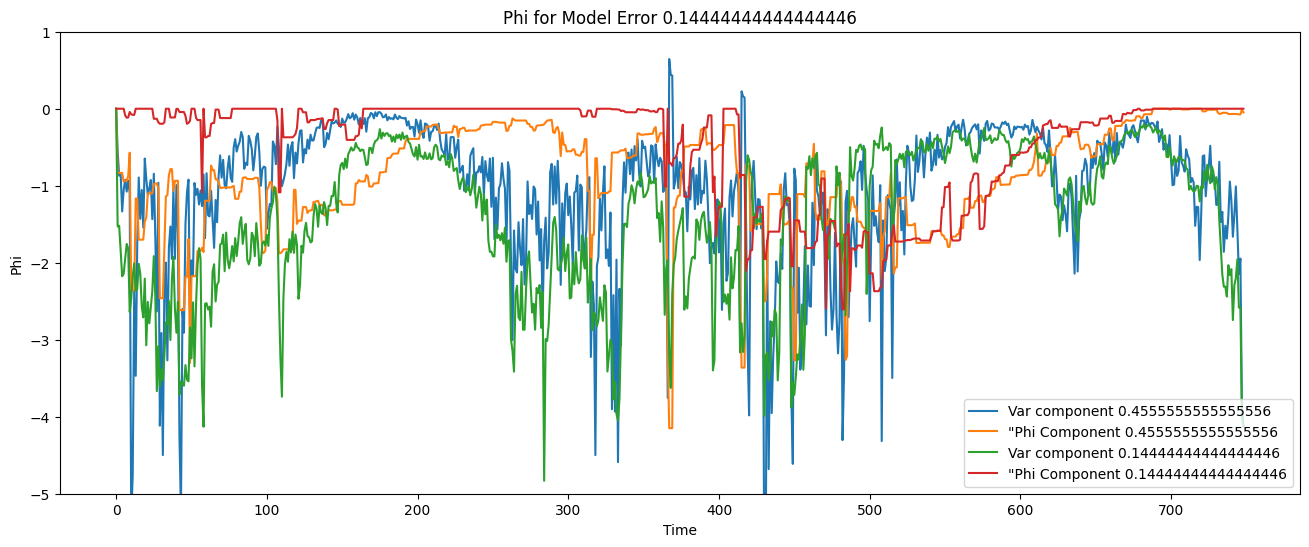

In [50]:
simple_compare_param_contribution([8, 1])

Very simply the var component is used more when it is a better indicator of the variance. This is no suprise but reasuring to see. 

In [93]:
def calculate_rel_percentage(key, results_dict, data_dict, param_type = 'lower'):
    
    if type(results_dict[key]) == list:
        params = results_dict[key][0]['params_t_list'][param_type]
    else:
        params = results_dict[key]['params_t_list'][param_type]
   
    phi, beta = list(zip(*params)) 
    var = np.array(data_dict[key][0][1][250:])

    # what do we do about positve, pretend never happens.
    var_component = beta * var

    ratio = var_component /(phi + var_component)

    #plt.plot(pd.Series(ratio).rolling(50).mean())
    #plt.show()

    return np.nanmean(ratio)

In [94]:
calculate_rel_percentage(0.1, simple_raw_results, simple_raw_data)

0.8086493061090709

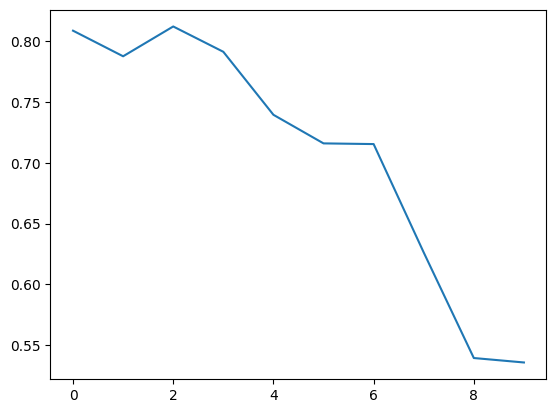

In [97]:
all = [calculate_rel_percentage(key, simple_raw_results, simple_raw_data) for key in simple_raw_results.keys()]
plt.plot(all)
plt.show()

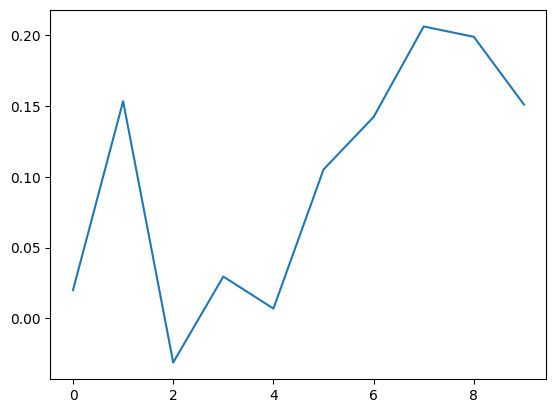

In [96]:
all = [calculate_rel_percentage(key, model_error_raw_results, model_error_data_dict) for key in model_error_raw_results.keys()]
plt.plot(all)
plt.show()

Example where when vol is used more performns better but also an example when it performs worse as well. 

I still think it gets used more as it is more consistent. 

## Would be useful to have a